___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
weather = pd.read_csv('weather.csv')

In [23]:
weather.shape

(8022, 26)

In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [25]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22'],
      dtype='object')

In [27]:
weather[['TMIN','TAVG', 'TMAX']].describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,7996.0,42.099425,17.386667,-10.0,29.0,42.0,57.0,77.0
TAVG,1217.0,52.493016,17.829792,6.0,39.0,54.0,68.0,86.0
TMAX,8005.0,61.247096,18.495043,13.0,46.0,62.0,77.0,102.0


In [28]:
temperature = weather[['TMIN','TAVG', 'TMAX']].copy()
temperature.fillna(0, inplace=True)

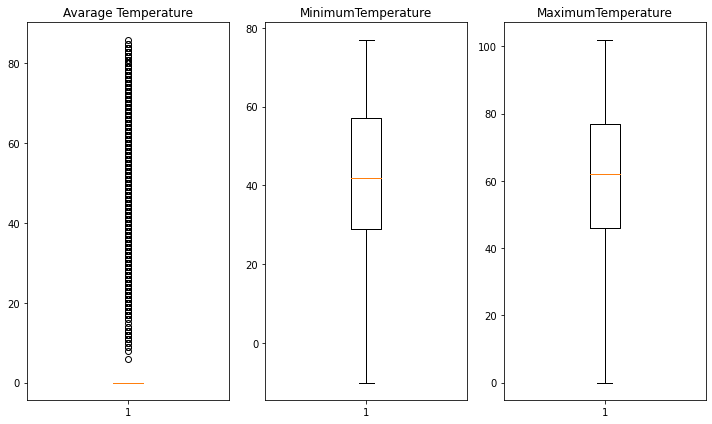

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(10,6))
ax[0].boxplot(temperature['TAVG'])
ax[0].set_title('Avarage Temperature')
ax[1].boxplot(temperature['TMIN'])
ax[1].set_title('MinimumTemperature')
ax[2].boxplot(temperature['TMAX'])
ax[2].set_title('MaximumTemperature')

fig.tight_layout()
plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [30]:
# weather.drop('TDIFF',axis=1, inplace=True)

In [31]:
weather['TDIFF'] = weather['TMAX'] -  weather['TMIN']
weather['TDIFF']

0       19.0
1       28.0
2       21.0
3       14.0
4       13.0
        ... 
8017    17.0
8018    14.0
8019    12.0
8020     8.0
8021    15.0
Name: TDIFF, Length: 8022, dtype: float64

In [32]:
weather['TDIFF'].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

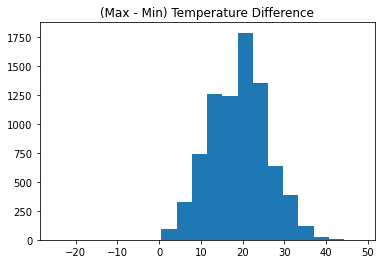

In [33]:
fig, ax = plt.subplots()
ax.set_title('(Max - Min) Temperature Difference')
ax.hist(weather['TDIFF'], bins=20)

plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [34]:
WT = weather.loc[:,'WT01':'WT22'].copy()
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [36]:
WT['bad_conditions'] = WT.sum(axis=1,skipna=True)
WT['bad_conditions']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Name: bad_conditions, Length: 8022, dtype: float64

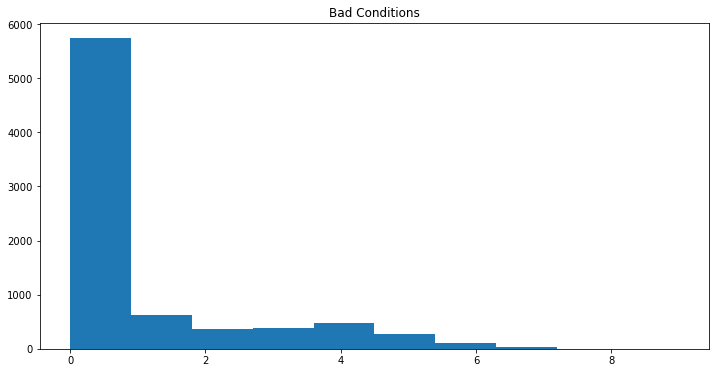

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Bad Conditions')
ax.hist(WT['bad_conditions'])
plt.show()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [38]:
WT['bad_conditions'].value_counts()


0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [39]:
mapping={0:'good',1:'bad',2:'bad',3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}
mapping

{0: 'good',
 1: 'bad',
 2: 'bad',
 3: 'bad',
 4: 'bad',
 5: 'worse',
 6: 'worse',
 7: 'worse',
 8: 'worse',
 9: 'worse'}

In [40]:
WT['rating'] = WT['bad_conditions'].map(mapping)
WT['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [41]:
WT.shape

(8022, 22)

In [42]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good


***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [43]:
from pandas.api.types import CategoricalDtype

In [44]:
cats = ['good', 'bad', 'worse']
cats

['good', 'bad', 'worse']

In [45]:
cats = CategoricalDtype(categories= cats, ordered=True)

In [46]:
WT['rating'] = WT.rating.astype(cats)

In [47]:
WT['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [48]:
weather['rating']= WT['rating']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [7]:
import numpy as np
import pandas as pd

In [8]:
ri = pd.read_csv('police.csv', low_memory=False)

In [9]:
ri = ri.drop('county_name',axis=1)

In [10]:
ri = ri.drop('county_fips',axis=1)

In [11]:
ri = ri.drop('fine_grained_location', axis = 1)

In [12]:
ri = ri.drop('state', axis = 1)

In [13]:
ri.dropna(how='all', subset=['driver_gender'],inplace=True)

In [14]:
ri.reset_index(drop = True, inplace = True)

In [15]:
ri['is_arrested'] = ri['is_arrested'].astype('bool')

In [16]:
combined = ri['stop_date'] + ' ' + ri['stop_time']

In [17]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [18]:
ri = ri.set_index('stop_datetime', drop = True)

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

In [19]:
ri.reset_index(inplace=True)

In [20]:
ri.shape

(480584, 23)

In [50]:
weather_rating = weather[['DATE', 'rating']].copy()

In [58]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [52]:
#weather_rating = weather_rating.rename(columns = {'DATE' : 'stop_date'})
#weather_rating.head()

In [53]:
weather_rating.shape

(8022, 2)

In [54]:
weather_rating['DATE'].nunique()

4017

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [55]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,000,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [56]:
ri.shape

(480584, 23)

In [64]:
ri['stop_date'].nunique()

3803

In [57]:
ri_weather = pd.merge(ri, weather_rating, how='left', left_on='stop_date', right_on='DATE', validate ='m:1')
ri_weather

MergeError: Merge keys are not unique in right dataset; not a many-to-one merge

In [59]:
ri_weather

NameError: name 'ri_weather' is not defined

In [42]:
ri.shape

(480584, 23)

In [ ]:
weather.info()

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.